In [1]:

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import netCDF4
from scipy import stats
#import statsmodels.api as sm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable
sys.path.append('/Users/gbromley/Dropbox/code/python_utilities/')
#from python_data_functions import extract_months
from python_met_functions import sat_vap_pres
#from python_data_functions import mk_test
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from matplotlib.offsetbox import AnchoredText
import plotting_functions as pf
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER


In [2]:
data_dir = '/Users/gbromley/Dropbox/Montana_Climate_Project/NGP_Climatology_Paper/Figures/Data/'
temp = xr.open_dataset(data_dir+'cru_temp_MJ_1970.nc')['t2m_trend']
temp_pval = xr.open_dataset(data_dir+'cru_temp_MJ_1970_pvalues.nc')['t2m_trend_pvalues']

vpd = xr.open_dataset(data_dir+'cru_vpd_MJ_1970.nc')['t2m_trend']
vpd_pval = xr.open_dataset(data_dir+'cru_vpd_MJ_1970_pvalues.nc')['t2m_trend_pvalues']

precip = xr.open_dataset(data_dir+'cru_precip_MJ_1970.nc')['t2m_trend']
precip_pval = xr.open_dataset(data_dir+'cru_precip_MJ_1970_pvalues.nc')['t2m_trend_pvalues']

In [3]:
temp_pval = temp_pval.where(temp_pval.values < 0.05)
vpd_pval = vpd_pval.where(vpd_pval.values < 0.05)
precip_pval = precip_pval.where(precip_pval.values < 0.05)

/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
t_season='MJ'
t_months=[5,6]
start_year = '1970-01-01'
end_year = '2016-01-01'
ext_e = -92
ext_w = -120
ext_n = 55
ext_s = 38

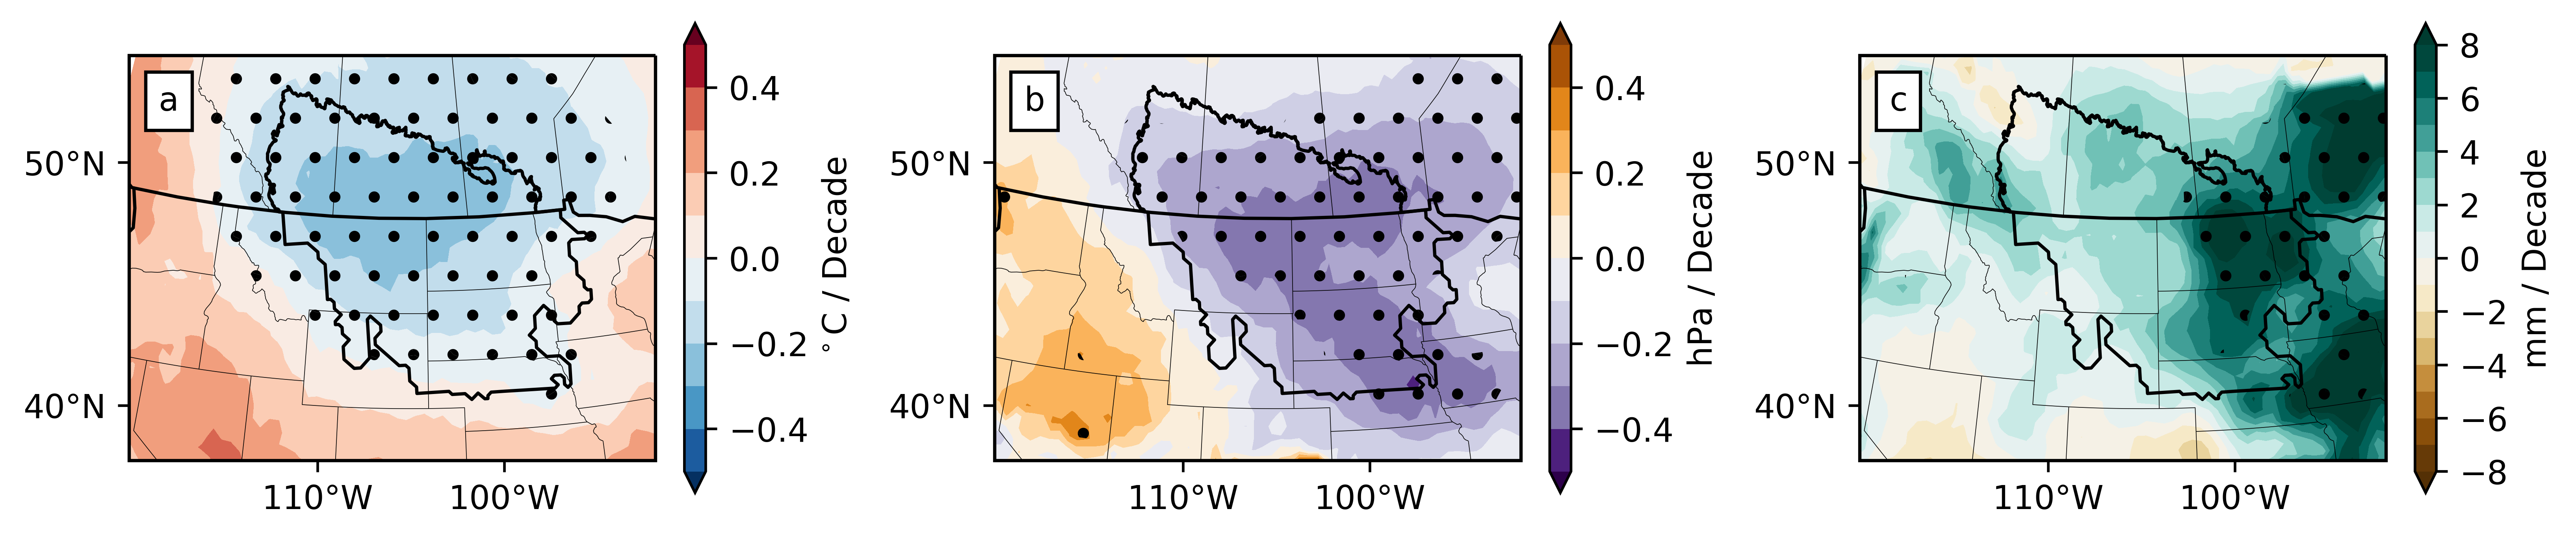

In [16]:
levs = [-.6,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.6]
precip_levs = [-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8]
fig = plt.figure(1,figsize=(11,9), dpi=600.0)
projection = ccrs.LambertConformal(central_longitude=-105,central_latitude=45,standard_parallels=[50,40])

ax1 = fig.add_subplot(131, projection = projection)

test = plt.contourf(temp.lon,temp.lat,temp[:,:].values,transform=ccrs.PlateCarree(),levels=levs,cmap='RdBu_r', extend='both')
plt.contourf(temp_pval.lon,temp_pval.lat,temp_pval[:,:].values,transform=ccrs.PlateCarree(),color='none',edgecolor='black',hatches="..",alpha=0.,add_colorbar = False)

ax1.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces, edgecolor='black', linewidth=0.2)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS)
shape_feature = ShapelyFeature(Reader('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax1.add_feature(shape_feature)


# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = [-130,-120,-110, -100, -90, -80]
yticks = [30, 40, 50, 60]
ax1.gridlines(xlocs=xticks, ylocs=yticks, linewidth=0)

# Label the end-points of the gridlines using the custom tick makers:
ax1.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax1.yaxis.set_major_formatter(LATITUDE_FORMATTER)
pf.lambert_xticks(ax1, xticks)
pf.lambert_yticks(ax1, yticks)

ax1.title.set_visible(False)
cb = plt.colorbar(test, cmap='RdBu_r',fraction=0.037)
cb.set_label('$^\circ$C / Decade',fontsize=10)

anchored_text = AnchoredText("a", loc=2)
ax1.add_artist(anchored_text)

### VPD Plot ###
ax2 = fig.add_subplot(132, projection = projection)

test2 = plt.contourf(vpd.lon,vpd.lat,vpd[:,:].values,transform=ccrs.PlateCarree(),levels=levs,cmap='PuOr_r', extend='both')

ax2.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax2.add_feature(states_provinces, edgecolor='black',linewidth=0.2)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS)
vpd_pval.plot.contourf(axes=ax2,transform=ccrs.PlateCarree(),color='none',edgecolor='black',hatches="..",alpha=0.,add_colorbar = False)


shape_feature = ShapelyFeature(Reader('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax2.add_feature(shape_feature)


# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = [-130,-120,-110, -100, -90, -80]
yticks = [30, 40, 50, 60]
ax2.gridlines(xlocs=xticks, ylocs=yticks, linewidth=0)

# Label the end-points of the gridlines using the custom tick makers:
ax2.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax2.yaxis.set_major_formatter(LATITUDE_FORMATTER)
pf.lambert_xticks(ax2, xticks)
pf.lambert_yticks(ax2, yticks)
ax2.xaxis.label.set_visible(False)
ax2.yaxis.label.set_visible(False)

ax2.title.set_visible(False)
cb = plt.colorbar(test2, cmap='PuOr_r',fraction=0.037)
cb.set_label('hPa / Decade',fontsize=10)
anchored_text = AnchoredText("b", loc=2)
ax2.add_artist(anchored_text)


### Precip Plot ###

ax3 = fig.add_subplot(133, projection = projection)
test3 = plt.contourf(precip.lon,precip.lat,precip[:,:].values,transform=ccrs.PlateCarree(),levels=precip_levs,cmap='BrBG', extend='both')

precip_pval.plot.contourf(axes=ax3,transform=ccrs.PlateCarree(),color='none',edgecolor='black',hatches="..",alpha=0.,add_colorbar = False)
ax3.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax3.add_feature(states_provinces, edgecolor='black',linewidth=0.2)
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS)
shape_feature = ShapelyFeature(Reader('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax3.add_feature(shape_feature)

ax3.title.set_visible(False)
cb = plt.colorbar(test3, cmap='BrBG',fraction=0.037)
cb.set_label('mm / Decade',fontsize=10)
anchored_text = AnchoredText("c", loc=2)
ax3.add_artist(anchored_text)

# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = [-130,-120,-110, -100, -90, -80]
yticks = [30, 40, 50, 60]
ax3.gridlines(xlocs=xticks, ylocs=yticks, color='black', linewidth = 0.0)

# Label the end-points of the gridlines using the custom tick makers:
ax3.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax3.yaxis.set_major_formatter(LATITUDE_FORMATTER)
pf.lambert_xticks(ax3, xticks)
pf.lambert_yticks(ax3, yticks)
ax3.xaxis.label.set_visible(False)
ax3.yaxis.label.set_visible(False)


plt.tight_layout()
plt.savefig('/Users/gbromley/Dropbox/Montana_Climate_Project/NGP_Climatology_Paper/Figures/Final/cru_3panel_sig_'+t_season+'_1970.png',bbox_inches='tight')
plt.show()
